# PREDICTING HOUSING PRICES FOR BOSTON CITIES DATA

The dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. 

There are 14 attributes in each case of the dataset:
1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per 10,000 dollars
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's

The task here is to predict the housing prices variable, MEDV, making use of other variables as input features and to find out which of the features could be relevant predictors.

This project analysis is done in Python 3.6


Import necessary libraries for the analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline 
import statsmodels.api as sm

Read the dataset into the variable, boston

In [2]:
boston = pd.read_csv("boston.csv")
print(boston.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


Print the size and check for NaN's

In [3]:
print(boston.shape)
boston.info()

(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


The dataset seems to be void of NaN's. Lets now try to visualize medv, the output variable agianst other variables.

## Data Visualization

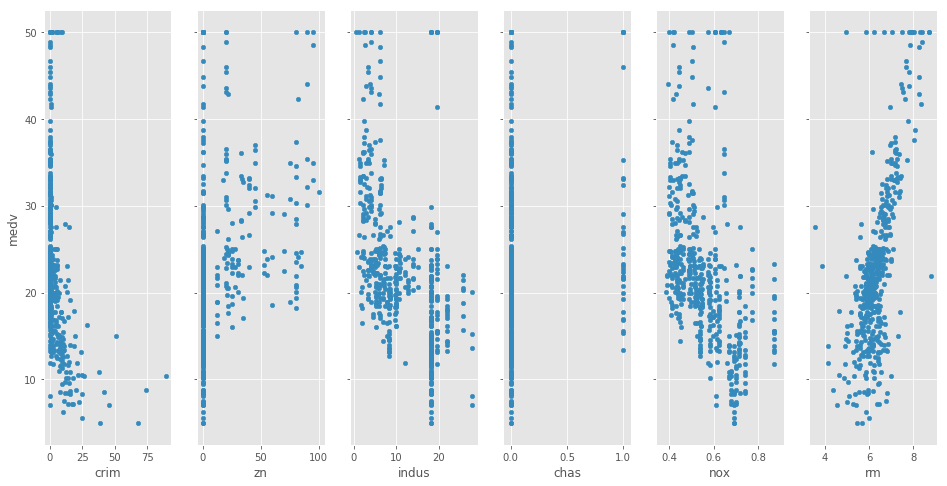

In [4]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 6, sharey = True)
boston.plot(kind='scatter', x = 'crim', y='medv', ax=axs[0], figsize = (16,8))
boston.plot(kind='scatter', x = 'zn', y='medv', ax=axs[1])
boston.plot(kind='scatter', x = 'indus', y='medv', ax=axs[2])
boston.plot(kind='scatter', x = 'chas', y='medv', ax=axs[3])
boston.plot(kind='scatter', x = 'nox', y='medv', ax=axs[4])
boston.plot(kind='scatter', x = 'rm', y='medv', ax=axs[5])
plt.show()

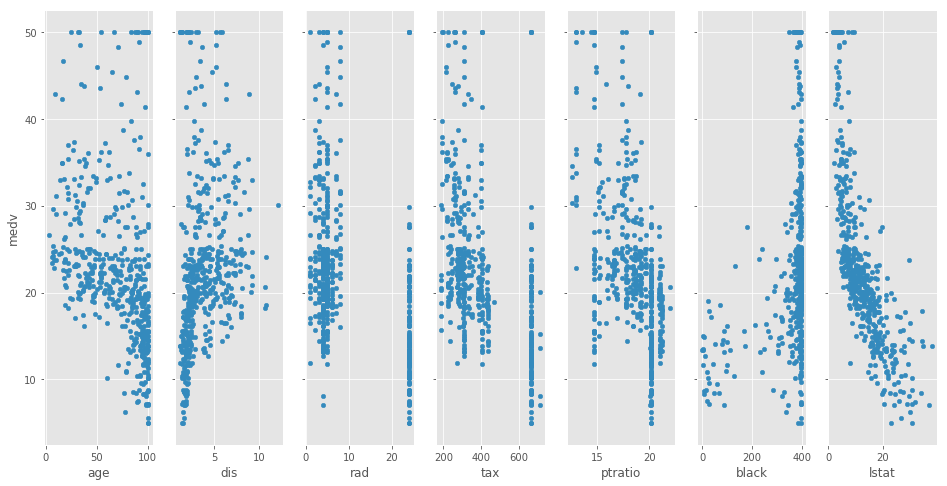

In [5]:
fig, axs = plt.subplots(1, 7, sharey = True)
boston.plot(kind='scatter', x = 'age', y='medv', ax=axs[0], figsize = (16,8))
boston.plot(kind='scatter', x = 'dis', y='medv', ax=axs[1])
boston.plot(kind='scatter', x = 'rad', y='medv', ax=axs[2])
boston.plot(kind='scatter', x = 'tax', y='medv', ax=axs[3])
boston.plot(kind='scatter', x = 'ptratio', y='medv', ax=axs[4])
boston.plot(kind='scatter', x = 'black', y='medv', ax=axs[5])
boston.plot(kind='scatter', x = 'lstat', y='medv', ax=axs[6])
plt.show()

From these plots we can observe some underlying nonlinearities in the data. Lets now split the dataset into training and test sets.

## Splitting data into training and test sets

In [6]:
#Import 'train_test_split'
from sklearn.model_selection import train_test_split
X = boston.iloc[:,0:13].values 
y = boston.iloc[:,13].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Lets move on to building some regession models to make predictions.

## Build Regression models

In [7]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Lets now make predictions on the test set using the model built

In [8]:
#Making Predictions
y_pred_linear_reg = linear_reg.predict(X_test)

Now evaluate the error parameters and print the  summary statistics for the regression model

In [9]:
from sklearn.metrics import mean_squared_error
mean_squared_error=mean_squared_error(y_test, y_pred_linear_reg)

#Adding intercept trems to X_train
X_train_mod = np.append(arr = np.ones((X_train.shape[0],1)).astype(int),values = X_train,axis = 1)
regressor_OLS = sm.OLS(endog=y_train, exog=X_train_mod).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     93.87
Date:                Thu, 29 Jun 2017   Prob (F-statistic):          9.85e-108
Time:                        00:03:24   Log-Likelihood:                -1102.0
No. Observations:                 379   AIC:                             2232.
Df Residuals:                     365   BIC:                             2287.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         36.9333      5.682      6.500      0.000        25.759    48.107
x1            -0.1177      0.037     -3.143      0.002        -0.191    -0.044
x2             0.0440      0.015      2.933      0.004         0.015     0.074
x3            -0.0058      0.067     -0.086      0.931        -0.137     0.125
x4             2.3934      0.962      2.488      0.013         0.502     4.285
x5           -15.5894      4.331     -3.600      0.000       -24.106    -7.073
x6             3.7690      0.472      7.981      0.000         2.840     4.698
x7            -0.0070      0.015     -0.472      0.637        -0.036     0.022
x8            -1.4350      0.224     -6.401      0.000        -1.876    -0.994
x9             0.2401      0.073      3.301      0.001         0.097     0.383
x10           -0.0113      0.004     -2.779      0.006        -0.019    -0.003
x11           -0.9855      0.145     -6.793      0.000        -1.271    -0.700
x12            0.0084      0.003      2.782      0.006         0.002     0.014
x13           -0.4991      0.058     -8.667      0.000        -0.612    -0.386
==============================================================================
Omnibus:                      141.715   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              665.545
Skew:                           1.549   Prob(JB):                    3.01e-145
Kurtosis:                       8.705   Cond. No.                     1.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
print("Mean Squared Error(MSE) of the test set: {:.3f} ".format(mean_squared_error))

Mean Squared Error(MSE) of the test set: 29.782 


Observe that two variables have higher p-values, so lets rebilud the model eliminating them.

In [11]:
#Import 'train_test_split'
from sklearn.model_selection import train_test_split
X = boston.iloc[:,(0,1,3,4,5,7,8,9,10,11,12)].values 
y = boston.iloc[:,13].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train,y_train)
#Making Predictions
y_pred_linear_reg = linear_reg.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test, y_pred_linear_reg)

#to print summary statistics
import statsmodels.formula.api as sm
#Adding intercept trems to X_train
X_train_mod = np.append(arr = np.ones((X_train.shape[0],1)).astype(int),values = X_train,axis = 1)
regressor_OLS = sm.OLS(endog=y_train, exog=X_train_mod).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     111.5
Date:                Thu, 29 Jun 2017   Prob (F-statistic):          9.87e-110
Time:                        00:03:24   Log-Likelihood:                -1102.1
No. Observations:                 379   AIC:                             2228.
Df Residuals:                     367   BIC:                             2276.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         37.1860      5.637      6.597      0.000        26.101    48.271
x1            -0.1171      0.037     -3.137      0.002        -0.190    -0.044
x2             0.0451      0.015      3.048      0.002         0.016     0.074
x3             2.3708      0.954      2.484      0.013         0.494     4.248
x4           -16.2677      3.984     -4.083      0.000       -24.103    -8.433
x5             3.7305      0.460      8.101      0.000         2.825     4.636
x6            -1.4002      0.208     -6.723      0.000        -1.810    -0.991
x7             0.2444      0.069      3.562      0.000         0.109     0.379
x8            -0.0115      0.004     -3.225      0.001        -0.019    -0.004
x9            -0.9924      0.143     -6.954      0.000        -1.273    -0.712
x10            0.0083      0.003      2.763      0.006         0.002     0.014
x11           -0.5085      0.054     -9.426      0.000        -0.615    -0.402
==============================================================================
Omnibus:                      138.757   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.629
Skew:                           1.526   Prob(JB):                    3.13e-137
Kurtosis:                       8.522   Cond. No.                     1.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
print("Mean Squared Error(MSE) of the test set: {:.3f} ".format(mse1))

Mean Squared Error(MSE) of the test set: 29.659 


We observe that the error values are not too small with the Linear Regression model. Lets see if other regression models can make some improvments over it.

In [14]:
#Fitting Support Vector Regression (Linear Kernel) to the data
from sklearn.svm import SVR
regressor = SVR(kernel ='linear')
regressor.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [15]:
# Predicting results
y_pred_svr = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_test, y_pred_svr)
print("Mean Squared Error(MSE) of the test set: {:.3f} ".format(mse2))

Mean Squared Error(MSE) of the test set: 34.706 


In [16]:
#Fitting Support Vector Regression (Radial Kernel) to the data
from sklearn.svm import SVR
regressor = SVR(kernel ='rbf')
regressor.fit(X_train, y_train)
# Predicting results
y_pred_svr = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(y_test, y_pred_svr)
print("Mean Squared Error(MSE) of the test set: {:.3f} ".format(mse3))

Mean Squared Error(MSE) of the test set: 78.564 


Evidently, Support Vector Regression caanot capture the features of the data well.
This is probably something to do with the scaling of the parameter values.
Lets move on.

In [17]:
#Fitting Decision Tree Regression 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

In [18]:
# Predicting results
y_pred_dt = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
mse4 = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error(MSE) of the test set: {:.3f} ".format(mse4))

Mean Squared Error(MSE) of the test set: 28.885 


In [27]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [28]:
# Predicting results
y_pred_rf = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
mse5= mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error(MSE) of the test set: {:.3f} ".format(mse5))

Mean Squared Error(MSE) of the test set: 16.497 


Lets now summarize the error values

In [29]:
Algorithm =['Linear Regression','Linear SVM','Kernel SVM','Decision Tree', 'Random Forests']
mse =[mse1,mse2,mse3,mse4,mse5]

In [30]:
df = pd.DataFrame.from_items([('Algorithm',Algorithm),('Mean Squared Error(MSE)', mse)])
df

,Algorithm,Mean Squared Error(MSE)
0,Linear Regression,29.659468
1,Linear SVM,34.705834
2,Kernel SVM,78.563541
3,Decision Tree,28.885197
4,Random Forests,16.497302


## Concluding Remarks

1. For the bston dataset, the Linear Regression is not capable of making good predictions , so does the SVM's
2. The Decision Tree and Random Forests are performing well, for the fact that the features of the dataset are not linearly separable. These algorithms are independent of the shape of the variables.
3. Cross-validation can be performed to optimize the parameters.